In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Import Data Set

In [6]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [33]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Remove extra spaces if any

df.rename(columns={
    'loan_id': 'Loan_ID',
    'no_of_dependents': 'No_of_Dependents',
    'education': 'Education',
    'self_employed': 'Self_Employed',
    'income_annum': 'Annual_Income',
    'loan_amount': 'Loan_Amount',
    'loan_term': 'Loan_Term',
    'cibil_score': 'CIBIL_Score',
    'residential_assets_value': 'Residential_Assets_Value',
    'commercial_assets_value': 'Commercial_Assets_Value',
    'luxury_assets_value': 'Luxury_Assets_Value',
    'bank_asset_value': 'Bank_Asset_Value',
    'loan_status': 'Loan_Status'
}, inplace=True)

print(df.columns)  # Verify the changes


Index(['Loan_ID', 'No_of_Dependents', 'Education', 'Self_Employed',
       'Annual_Income', 'Loan_Amount', 'Loan_Term', 'CIBIL_Score',
       'Residential_Assets_Value', 'Commercial_Assets_Value',
       'Luxury_Assets_Value', 'Bank_Asset_Value', 'Loan_Status'],
      dtype='object')


In [34]:
df.head()

,Loan_ID,No_of_Dependents,Education,Self_Employed,Annual_Income,Loan_Amount,Loan_Term,CIBIL_Score,Residential_Assets_Value,Commercial_Assets_Value,Luxury_Assets_Value,Bank_Asset_Value,Loan_Status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [35]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 3


In [36]:
df.columns = df.columns.str.strip()

In [37]:
df.shape

(4269, 13)

In [38]:
df.isnull().sum()

Loan_ID                     0
No_of_Dependents            0
Education                   0
Self_Employed               0
Annual_Income               0
Loan_Amount                 0
Loan_Term                   0
CIBIL_Score                 0
Residential_Assets_Value    0
Commercial_Assets_Value     0
Luxury_Assets_Value         0
Bank_Asset_Value            0
Loan_Status                 0
dtype: int64

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Loan_ID                   4269 non-null   int64 
 1   No_of_Dependents          4269 non-null   int64 
 2   Education                 4269 non-null   object
 3   Self_Employed             4269 non-null   object
 4   Annual_Income             4269 non-null   int64 
 5   Loan_Amount               4269 non-null   int64 
 6   Loan_Term                 4269 non-null   int64 
 7   CIBIL_Score               4269 non-null   int64 
 8   Residential_Assets_Value  4269 non-null   int64 
 9   Commercial_Assets_Value   4269 non-null   int64 
 10  Luxury_Assets_Value       4269 non-null   int64 
 11  Bank_Asset_Value          4269 non-null   int64 
 12  Loan_Status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [40]:
df[['Education', 'Self_Employed', 'Loan_Status']]

,Education,Self_Employed,Loan_Status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected
...,...,...,...
4264,Graduate,Yes,Rejected
4265,Not Graduate,Yes,Approved
4266,Not Graduate,No,Rejected
4267,Not Graduate,No,Approved


# Encoding Target Variable

In [41]:
label_encoder = preprocessing.LabelEncoder()    # 0 is gradute and 1 is not gradute
obj = (df.dtypes == 'object')                      # 0 is no and 1 is yes
for col in list(obj[obj].index):                   # 0 is approved and 1 is rejected.
  df[col] = label_encoder.fit_transform(df[col])    

In [42]:
df[['Education', 'Self_Employed', 'Loan_Status']]

,Education,Self_Employed,Loan_Status
0,0,0,0
1,1,1,1
2,0,0,1
3,0,0,1
4,1,1,1
...,...,...,...
4264,0,1,1
4265,1,1,0
4266,1,0,1
4267,1,0,0


# Data visulization 

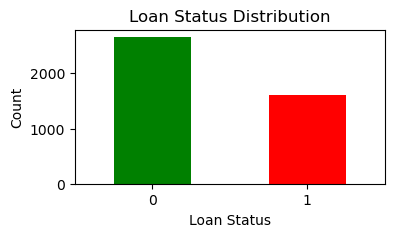

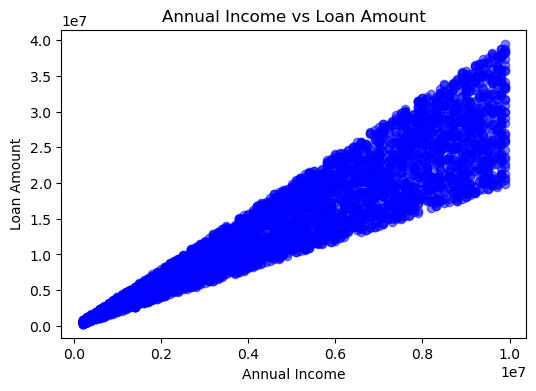

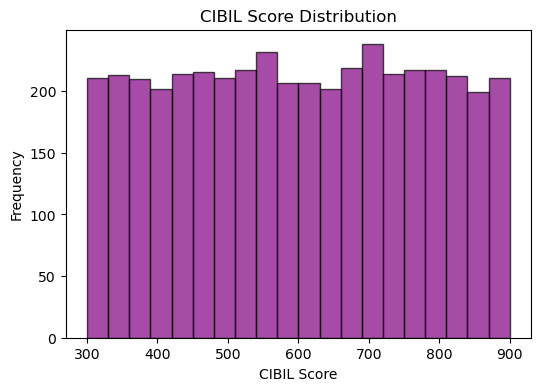

<Figure size 600x400 with 0 Axes>

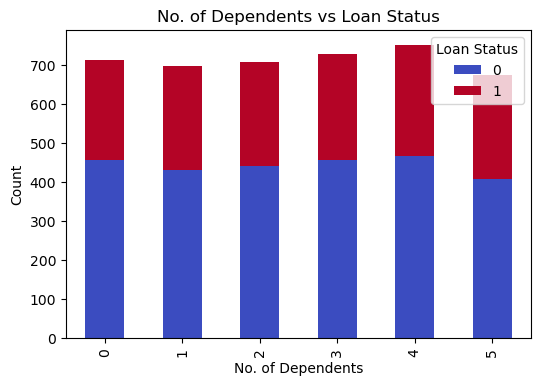

<Figure size 600x400 with 0 Axes>

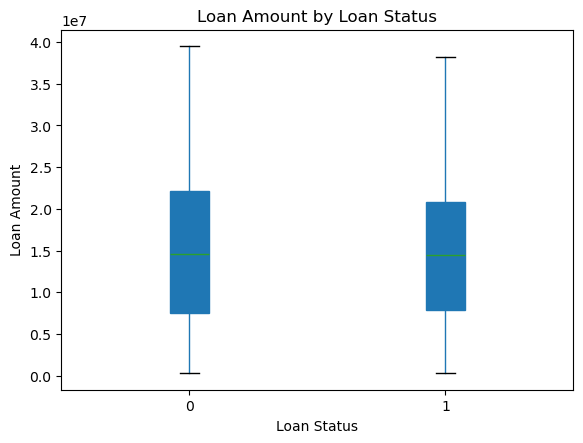

In [43]:
# Rename columns for clarity  
df.columns = ['Loan_ID', 'No_of_Dependents', 'Education', 'Self_Employed', 'Annual_Income',  
              'Loan_Amount', 'Loan_Term', 'CIBIL_Score', 'Residential_Assets_Value',  
              'Commercial_Assets_Value', 'Luxury_Assets_Value', 'Bank_Asset_Value', 'Loan_Status']  

# Loan Status Distribution (Bar Chart)  
plt.figure(figsize=(4,2))  
df['Loan_Status'].value_counts().plot(kind='bar', color=['green', 'red'])  
plt.title('Loan Status Distribution')  
plt.xlabel('Loan Status')  
plt.ylabel('Count')  
plt.xticks(rotation=0)  
plt.show()  

# Income vs Loan Amount (Scatter Plot)  
plt.figure(figsize=(6,4))  
plt.scatter(df['Annual_Income'], df['Loan_Amount'], color='blue', alpha=0.5)  
plt.title('Annual Income vs Loan Amount')  
plt.xlabel('Annual Income')  
plt.ylabel('Loan Amount')  
plt.show()  

# CIBIL Score Distribution (Histogram)  
plt.figure(figsize=(6,4))  
plt.hist(df['CIBIL_Score'], bins=20, color='purple', edgecolor='black', alpha=0.7)  
plt.title('CIBIL Score Distribution')  
plt.xlabel('CIBIL Score')  
plt.ylabel('Frequency')  
plt.show()  

# No. of Dependents vs Loan Status (Stacked Bar Chart)  
plt.figure(figsize=(6,4))  
pd.crosstab(df['No_of_Dependents'], df['Loan_Status']).plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(6,4))  
plt.title('No. of Dependents vs Loan Status')  
plt.xlabel('No. of Dependents')  
plt.ylabel('Count')  
plt.legend(title="Loan Status")  
plt.show()  

# Loan Amount by Loan Status (Box Plot)  
plt.figure(figsize=(6,4))  
df.boxplot(column='Loan_Amount', by='Loan_Status', grid=False, patch_artist=True)  
plt.title('Loan Amount by Loan Status')  
plt.xlabel('Loan Status')  
plt.ylabel('Loan Amount')  
plt.suptitle('')  
plt.show()  

# Splitting Data into Training and Testing Sets

In [44]:
X = df.drop(columns=['Loan_Status']) # All columns except target
y = df['Loan_Status']  # Target variable

In [45]:
df.shape

(4269, 13)

In [46]:
#df.columns

In [47]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Apply StandardScaler only on numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

In [49]:
(X_train).head()

,Loan_ID,No_of_Dependents,Education,Self_Employed,Annual_Income,Loan_Amount,Loan_Term,CIBIL_Score,Residential_Assets_Value,Commercial_Assets_Value,Luxury_Assets_Value,Bank_Asset_Value
1675,1676,5,1,0,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,1165,0,1,1,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,193,1,0,0,800000,2900000,8,682,2200000,1100000,2900000,700000
910,911,2,0,1,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,568,5,0,1,3000000,11100000,12,441,8500000,2500000,7300000,2000000


In [50]:
(X_test).head()

,Loan_ID,No_of_Dependents,Education,Self_Employed,Annual_Income,Loan_Amount,Loan_Term,CIBIL_Score,Residential_Assets_Value,Commercial_Assets_Value,Luxury_Assets_Value,Bank_Asset_Value
1703,1704,5,0,0,5400000,19700000,20,423,6500000,10000000,15700000,7300000
1173,1174,2,0,0,5900000,14000000,8,599,4700000,9500000,17800000,6700000
308,309,3,0,0,9600000,19900000,14,452,4200000,16200000,28500000,6600000
1322,1323,2,0,0,6200000,23400000,8,605,10000000,10800000,21800000,9200000
3271,3272,3,1,1,5800000,14100000,12,738,11700000,4400000,15400000,8400000


In [51]:
print("Train-Test Split Completed!")
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Train-Test Split Completed!
Training Data: (3415, 12), Testing Data: (854, 12)


# Train Model

In [52]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred) * 100)

Logistic Regression Accuracy: 82.20140515222482


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred) * 100)

Random Forest Accuracy: 97.65807962529274


In [54]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred) * 100)


XGBoost Accuracy: 98.12646370023418


# Save the best Model

In [55]:
import pickle

# Save Logistic Regression model
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(logistic_model, file)

# Save Random Forest model
with open("random_forest.pkl", "wb") as file:
    pickle.dump(rf_model, file)

# Save XGBoost model
with open("xgboost.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

print("All models saved successfully!")


All models saved successfully!


In [57]:
import pickle
from sklearn.metrics import accuracy_score

# Store models in a dictionary
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Evaluate models
accuracies = {name: accuracy_score(y_test, model.predict(X_test)) * 100 for name, model in models.items()}

# Find the best model
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
best_accuracy = accuracies[best_model_name]

# Print the best model and accuracy
print("\n=== Best Model ===")
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.2f}%")

# Save the best model
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("\n✅ Best model saved successfully as best_model.pkl!")



=== Best Model ===
Best Model: XGBoost
Best Accuracy: 98.13%

✅ Best model saved successfully as best_model.pkl!
